In [7]:
import os
import pandas as pd
from pathlib import Path

# pick one of the available folders
def read_data(path):
    files = {}
    for filename in path.glob('*'):
        if filename.suffix == '.csv':
            files[filename.stem] = pd.read_csv(filename)
        elif filename.suffix == '.dat':
            if filename.stem == 'ratings':
                columns = ['userId', 'movieId', 'rating', 'timestamp']
            elif filename.stem == 'users':
                columns = ['userId', 'gender', 'age', 'occupation', 'zip']
            else:
                columns = ['movieId', 'title', 'genres']
            data = pd.read_csv(filename, sep='::', names=columns, engine='python')
            files[filename.stem] = data
    return files['ratings'], files['movies'], files['users']

ratings, movies, users = read_data(Path(os.getcwd()))

In [8]:

del users['zip']
del users['userId']
users

,gender,age,occupation
0,F,1,10
1,M,56,16
2,M,25,15
3,M,45,7
4,M,25,20
...,...,...,...
6035,F,25,15
6036,F,45,1
6037,F,56,1
6038,F,45,0


<AxesSubplot:xlabel='gender'>

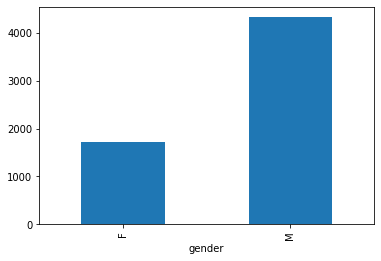

In [9]:
by_gender = users.groupby('gender')
by_gender.size().plot(kind='bar')

<AxesSubplot:xlabel='age'>

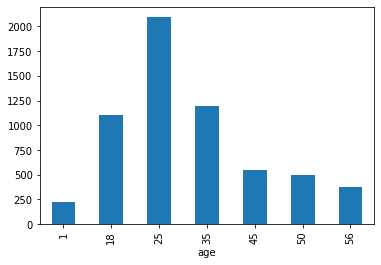

In [10]:
by_age = users.groupby('age')
by_age.size().plot(kind='bar')

<AxesSubplot:xlabel='occupation'>

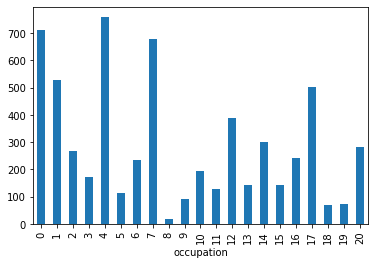

In [11]:
by_occup = users.groupby('occupation')
by_occup.size().plot(kind='bar')

<AxesSubplot:>

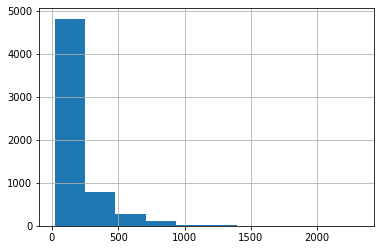

In [12]:
ratings.groupby('userId').count().rating.hist(bins=10)